# Chapter 3 Examples and Computer Exercises

Documentation on datasets can be found at:
https://www.rdocumentation.org/packages/wooldridge/versions/1.4-2

In [115]:
library(wooldridge)
library(dplyr)
library(ggplot2)
library(broom) # augment()
library(gridExtra) # grid.arrange()
library(tidyr) # drop_na()
# e.g. grid.arrange(gg1,gg2,gg3,layout_matrix=rbind(c(1,1),c(2,3)))

In [143]:
options(scipen=6, digits=4) #turn off scientific notation. set scipen=0, digits=7 switch to default.

# Examples

## Examples 3.1, 3.4 Determinants of College GPA

In [5]:
str(gpa1)

'data.frame':	141 obs. of  29 variables:
 $ age     : int  21 21 20 19 20 20 22 22 22 19 ...
 $ soph    : int  0 0 0 1 0 0 0 0 0 1 ...
 $ junior  : int  0 0 1 0 1 0 0 0 0 0 ...
 $ senior  : int  1 1 0 0 0 1 0 0 0 0 ...
 $ senior5 : int  0 0 0 0 0 0 1 1 1 0 ...
 $ male    : int  0 0 0 1 0 1 0 0 0 0 ...
 $ campus  : int  0 0 0 1 0 1 0 0 0 0 ...
 $ business: int  1 1 1 1 1 1 1 0 0 1 ...
 $ engineer: int  0 0 0 0 0 0 0 0 0 0 ...
 $ colGPA  : num  3 3.4 3 3.5 3.6 ...
 $ hsGPA   : num  3 3.2 3.6 3.5 3.9 ...
 $ ACT     : int  21 24 26 27 28 25 25 22 21 27 ...
 $ job19   : int  0 0 1 1 0 0 0 1 1 1 ...
 $ job20   : int  1 1 0 0 1 0 0 0 0 0 ...
 $ drive   : int  1 1 0 0 0 0 0 1 1 0 ...
 $ bike    : int  0 0 0 0 1 0 1 0 0 0 ...
 $ walk    : int  0 0 1 1 0 1 0 0 0 1 ...
 $ voluntr : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PC      : int  0 0 0 0 0 0 0 1 0 1 ...
 $ greek   : int  0 0 0 0 0 0 1 0 0 0 ...
 $ car     : int  1 1 1 0 1 1 1 0 1 0 ...
 $ siblings: int  1 0 1 1 1 1 1 1 1 1 ...
 $ bgfriend: int  0 1

In [7]:
model <- lm(colGPA ~ hsGPA + ACT, gpa1)
summary(model)


Call:
lm(formula = colGPA ~ hsGPA + ACT, data = gpa1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85442 -0.24666 -0.02614  0.28127  0.85357 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.286328   0.340822   3.774 0.000238 ***
hsGPA       0.453456   0.095813   4.733 5.42e-06 ***
ACT         0.009426   0.010777   0.875 0.383297    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3403 on 138 degrees of freedom
Multiple R-squared:  0.1764,	Adjusted R-squared:  0.1645 
F-statistic: 14.78 on 2 and 138 DF,  p-value: 1.526e-06


In [38]:
round(summary(lm(colGPA ~ ACT, gpa1))$coefficients, 3)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.403,0.264,9.095,0.000
ACT,0.027,0.011,2.491,0.014


## Example 3.2 Hourly Wage Equation

In [9]:
str(wage1)

'data.frame':	526 obs. of  24 variables:
 $ wage    : num  3.1 3.24 3 6 5.3 ...
 $ educ    : int  11 12 11 8 12 16 18 12 12 17 ...
 $ exper   : int  2 22 2 44 7 9 15 5 26 22 ...
 $ tenure  : int  0 2 0 28 2 8 7 3 4 21 ...
 $ nonwhite: int  0 0 0 0 0 0 0 0 0 0 ...
 $ female  : int  1 1 0 0 0 0 0 1 1 0 ...
 $ married : int  0 1 0 1 1 1 0 0 0 1 ...
 $ numdep  : int  2 3 2 0 1 0 0 0 2 0 ...
 $ smsa    : int  1 1 0 1 0 1 1 1 1 1 ...
 $ northcen: int  0 0 0 0 0 0 0 0 0 0 ...
 $ south   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ west    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ construc: int  0 0 0 0 0 0 0 0 0 0 ...
 $ ndurman : int  0 0 0 0 0 0 0 0 0 0 ...
 $ trcommpu: int  0 0 0 0 0 0 0 0 0 0 ...
 $ trade   : int  0 0 1 0 0 0 1 0 1 0 ...
 $ services: int  0 1 0 0 0 0 0 0 0 0 ...
 $ profserv: int  0 0 0 0 0 1 0 0 0 0 ...
 $ profocc : int  0 0 0 0 0 1 1 1 1 1 ...
 $ clerocc : int  0 0 0 1 0 0 0 0 0 0 ...
 $ servocc : int  0 1 0 0 0 0 0 0 0 0 ...
 $ lwage   : num  1.13 1.18 1.1 1.79 1.67 ...
 $ expersq : int  

In [10]:
model <- lm(lwage ~ educ + exper + tenure, wage1)
summary(model)


Call:
lm(formula = lwage ~ educ + exper + tenure, data = wage1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.05802 -0.29645 -0.03265  0.28788  1.42809 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.284360   0.104190   2.729  0.00656 ** 
educ        0.092029   0.007330  12.555  < 2e-16 ***
exper       0.004121   0.001723   2.391  0.01714 *  
tenure      0.022067   0.003094   7.133 3.29e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4409 on 522 degrees of freedom
Multiple R-squared:  0.316,	Adjusted R-squared:  0.3121 
F-statistic: 80.39 on 3 and 522 DF,  p-value: < 2.2e-16


## Example 3.3 Participation in 401(k) Pension Plans

#### str(k401k)

In [35]:
round(summary(lm(prate ~ mrate + age, k401k))$coefficients, 2)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),80.12,0.78,102.85,0
mrate,5.52,0.53,10.50,0
age,0.24,0.04,5.44,0


In [34]:
round(summary(lm(prate ~ mrate, k401k))$coefficients, 2)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),83.08,0.56,147.48,0
mrate,5.86,0.53,11.12,0


## Example 3.5 Explaining Arrest Records

In [39]:
str(crime1)

'data.frame':	2725 obs. of  16 variables:
 $ narr86 : int  0 2 1 2 1 0 2 5 0 0 ...
 $ nfarr86: int  0 2 1 2 1 0 2 3 0 0 ...
 $ nparr86: int  0 0 0 1 0 0 1 5 0 0 ...
 $ pcnv   : num  0.38 0.44 0.33 0.25 0 ...
 $ avgsen : num  17.6 0 22.8 0 0 ...
 $ tottime: num  35.2 0 22.8 0 0 ...
 $ ptime86: int  12 0 0 5 0 0 0 0 9 0 ...
 $ qemp86 : num  0 1 0 2 2 4 0 0 0 3 ...
 $ inc86  : num  0 0.8 0 8.8 8.1 ...
 $ durat  : num  0 0 11 0 1 ...
 $ black  : int  0 0 1 0 0 0 1 0 1 0 ...
 $ hispan : int  0 1 0 1 0 0 0 0 0 1 ...
 $ born60 : int  1 0 1 1 0 1 1 1 1 1 ...
 $ pcnvsq : num  0.1444 0.1936 0.1089 0.0625 0 ...
 $ pt86sq : int  144 0 0 25 0 0 0 0 81 0 ...
 $ inc86sq: num  0 0.64 0 77.44 65.61 ...
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"


In [42]:
model <- lm(narr86 ~ pcnv + ptime86 + qemp86, crime1)
summary(model)


Call:
lm(formula = narr86 ~ pcnv + ptime86 + qemp86, data = crime1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7118 -0.4031 -0.2953  0.3452 11.4358 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.711772   0.033007  21.565  < 2e-16 ***
pcnv        -0.149927   0.040865  -3.669 0.000248 ***
ptime86     -0.034420   0.008591  -4.007 6.33e-05 ***
qemp86      -0.104113   0.010388 -10.023  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8416 on 2721 degrees of freedom
Multiple R-squared:  0.04132,	Adjusted R-squared:  0.04027 
F-statistic:  39.1 on 3 and 2721 DF,  p-value: < 2.2e-16


In [43]:
model <- lm(narr86 ~ pcnv + avgsen + ptime86 + qemp86, crime1)
summary(model)


Call:
lm(formula = narr86 ~ pcnv + avgsen + ptime86 + qemp86, data = crime1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9330 -0.4247 -0.2934  0.3506 11.4403 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.706756   0.033151  21.319  < 2e-16 ***
pcnv        -0.150832   0.040858  -3.692 0.000227 ***
avgsen       0.007443   0.004734   1.572 0.115993    
ptime86     -0.037391   0.008794  -4.252 2.19e-05 ***
qemp86      -0.103341   0.010396  -9.940  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8414 on 2720 degrees of freedom
Multiple R-squared:  0.04219,	Adjusted R-squared:  0.04079 
F-statistic: 29.96 on 4 and 2720 DF,  p-value: < 2.2e-16


# Computer Exercises

## C1

(i) " - " Lower birthweights should be associated with cigarette usage

(ii) Yes, a draw from a lower income group is more likely to smoke

In [45]:
str(bwght)

'data.frame':	1388 obs. of  14 variables:
 $ faminc  : num  13.5 7.5 0.5 15.5 27.5 7.5 65 27.5 27.5 37.5 ...
 $ cigtax  : num  16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 ...
 $ cigprice: num  122 122 122 122 122 ...
 $ bwght   : int  109 133 129 126 134 118 140 86 121 129 ...
 $ fatheduc: int  12 6 NA 12 14 12 16 12 12 16 ...
 $ motheduc: int  12 12 12 12 12 14 14 14 17 18 ...
 $ parity  : int  1 2 2 2 2 6 2 2 2 2 ...
 $ male    : int  1 1 0 1 1 1 0 0 0 0 ...
 $ white   : int  1 0 0 0 1 0 1 0 1 1 ...
 $ cigs    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ lbwght  : num  4.69 4.89 4.86 4.84 4.9 ...
 $ bwghtlbs: num  6.81 8.31 8.06 7.88 8.38 ...
 $ packs   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ lfaminc : num  2.603 2.015 -0.693 2.741 3.314 ...
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"


In [49]:
summary(lm(bwght ~ cigs, bwght))


Call:
lm(formula = bwght ~ cigs, data = bwght)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.772 -11.772   0.297  13.228 151.228 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 119.77190    0.57234 209.267  < 2e-16 ***
cigs         -0.51377    0.09049  -5.678 1.66e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.13 on 1386 degrees of freedom
Multiple R-squared:  0.02273,	Adjusted R-squared:  0.02202 
F-statistic: 32.24 on 1 and 1386 DF,  p-value: 1.662e-08


In [50]:
summary(lm(bwght ~ cigs + faminc, bwght))


Call:
lm(formula = bwght ~ cigs + faminc, data = bwght)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.061 -11.543   0.638  13.126 150.083 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 116.97413    1.04898 111.512  < 2e-16 ***
cigs         -0.46341    0.09158  -5.060 4.75e-07 ***
faminc        0.09276    0.02919   3.178  0.00151 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.06 on 1385 degrees of freedom
Multiple R-squared:  0.0298,	Adjusted R-squared:  0.0284 
F-statistic: 21.27 on 2 and 1385 DF,  p-value: 7.942e-10


In [8]:
data <- bwght %>% mutate(cigs_bi = case_when(
cigs == 0 ~ 0,
cigs != 0 ~ 1))

In [15]:
count(data, cigs_bi, sort=TRUE)

cigs_bi,n
<dbl>,<int>
0,1176
1,212


In [9]:
model <- glm(cigs_bi ~ faminc, family=binomial, data=data)
summary(model)


Call:
glm(formula = cigs_bi ~ faminc, family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8253  -0.6376  -0.5165  -0.3104   2.4726  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.885669   0.132258  -6.697 2.13e-11 ***
faminc      -0.032661   0.004911  -6.650 2.92e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.5  on 1387  degrees of freedom
Residual deviance: 1134.3  on 1386  degrees of freedom
AIC: 1138.3

Number of Fisher Scoring iterations: 5


In [30]:
summary(lm(cigs~faminc, data))


Call:
lm(formula = cigs ~ faminc, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-3.661 -2.668 -1.896 -0.103 47.829 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.688107   0.291297  12.661  < 2e-16 ***
faminc      -0.055154   0.008432  -6.541 8.58e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.885 on 1386 degrees of freedom
Multiple R-squared:  0.02994,	Adjusted R-squared:  0.02924 
F-statistic: 42.78 on 1 and 1386 DF,  p-value: 8.575e-11


## C2

In [33]:
str(hprice1)

'data.frame':	88 obs. of  10 variables:
 $ price   : num  300 370 191 195 373 ...
 $ assess  : num  349 352 218 232 319 ...
 $ bdrms   : int  4 3 3 3 4 5 3 3 3 3 ...
 $ lotsize : num  6126 9903 5200 4600 6095 ...
 $ sqrft   : int  2438 2076 1374 1448 2514 2754 2067 1731 1767 1890 ...
 $ colonial: int  1 1 0 1 1 1 1 1 0 0 ...
 $ lprice  : num  5.7 5.91 5.25 5.27 5.92 ...
 $ lassess : num  5.86 5.86 5.38 5.45 5.77 ...
 $ llotsize: num  8.72 9.2 8.56 8.43 8.72 ...
 $ lsqrft  : num  7.8 7.64 7.23 7.28 7.83 ...
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"


In [32]:
# (i)
model <- lm(price ~ sqrft + bdrms, hprice1)
summary(model)


Call:
lm(formula = price ~ sqrft + bdrms, data = hprice1)

Residuals:
     Min       1Q   Median       3Q      Max 
-127.627  -42.876   -7.051   32.589  229.003 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -19.31500   31.04662  -0.622    0.536    
sqrft         0.12844    0.01382   9.291 1.39e-14 ***
bdrms        15.19819    9.48352   1.603    0.113    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 63.04 on 85 degrees of freedom
Multiple R-squared:  0.6319,	Adjusted R-squared:  0.6233 
F-statistic: 72.96 on 2 and 85 DF,  p-value: < 2.2e-16


In [35]:
cor(hprice1$sqrft, hprice1$bdrms)

[1] 0.5314736

(i) $price = -19.32 + 0.13 * sqrft + 15.20 * bdrms$

(ii) 15.20

(iii) 15.20 + 0.13 * 140 = 33.4

(iv) R-squared = 0.632, 63.2% of the variation in price is explained by sqrft and bdrms

(v) 354.6052

(vi) The residual from the estimation on the first observation is 54.6052. The standard errors of the coefficients would suggest a price range of 354.6 +/- 37.85. It would seem the buyers got a good deal based off of our model.

In [36]:
# (v) .fitted value 
hprice_aug <- augment(model)
head(hprice_aug)

price,sqrft,bdrms,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
300.000,2438,4,354.6052,-54.605249,0.01781566,63.13341,0.0046181120,-0.8739536
370.000,2076,3,292.9131,77.086850,0.02009644,62.84724,0.0104302034,1.2352052
191.000,1374,3,202.7509,-11.750930,0.02560120,63.40569,0.0003122562,-0.1888228
195.000,1448,3,212.2552,-17.255210,0.02278638,63.39039,0.0005958220,-0.2768700
373.000,2514,4,364.3664,8.633599,0.02004388,63.41185,0.0001304764,0.1383372
466.275,2754,5,410.3893,55.885711,0.04694049,63.11067,0.0135359554,0.9080113


## C3

In [37]:
str(ceosal2)

'data.frame':	177 obs. of  15 variables:
 $ salary  : int  1161 600 379 651 497 1067 945 1261 503 1094 ...
 $ age     : int  49 43 51 55 44 64 59 63 47 64 ...
 $ college : int  1 1 1 1 1 1 1 1 1 1 ...
 $ grad    : int  1 1 1 0 1 1 0 1 1 1 ...
 $ comten  : int  9 10 9 22 8 7 35 32 4 39 ...
 $ ceoten  : int  2 10 3 22 6 7 10 8 4 5 ...
 $ sales   : num  6200 283 169 1100 351 19000 536 4800 610 2900 ...
 $ profits : int  966 48 40 -54 28 614 24 191 7 230 ...
 $ mktval  : num  23200 1100 1100 1000 387 3900 623 2100 454 3900 ...
 $ lsalary : num  7.06 6.4 5.94 6.48 6.21 ...
 $ lsales  : num  8.73 5.65 5.13 7 5.86 ...
 $ lmktval : num  10.05 7 7 6.91 5.96 ...
 $ comtensq: int  81 100 81 484 64 49 1225 1024 16 1521 ...
 $ ceotensq: int  4 100 9 484 36 49 100 64 16 25 ...
 $ profmarg: num  15.58 16.96 23.67 -4.91 7.98 ...
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"


In [39]:
model <- lm(lsalary ~ lsales + lmktval, ceosal2)
summary(model)


Call:
lm(formula = lsalary ~ lsales + lmktval, data = ceosal2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.28060 -0.31137 -0.01269  0.30645  1.91210 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.62092    0.25441  18.163  < 2e-16 ***
lsales       0.16213    0.03967   4.087 6.67e-05 ***
lmktval      0.10671    0.05012   2.129   0.0347 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5103 on 174 degrees of freedom
Multiple R-squared:  0.2991,	Adjusted R-squared:  0.2911 
F-statistic: 37.13 on 2 and 174 DF,  p-value: 3.727e-14


(i) $ ln(salary) = 4.621 + 0.162*ln(sales) + 0.107*ln(mktval) $

In [45]:
model <- lm(lsalary ~ lsales + lmktval + profits, ceosal2)
summary(model)


Call:
lm(formula = lsalary ~ lsales + lmktval + profits, data = ceosal2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27002 -0.31026 -0.01027  0.31043  1.91489 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.687e+00  3.797e-01  12.343  < 2e-16 ***
lsales      1.614e-01  3.991e-02   4.043 7.92e-05 ***
lmktval     9.753e-02  6.369e-02   1.531    0.128    
profits     3.566e-05  1.520e-04   0.235    0.815    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5117 on 173 degrees of freedom
Multiple R-squared:  0.2993,	Adjusted R-squared:  0.2872 
F-statistic: 24.64 on 3 and 173 DF,  p-value: 2.53e-13


In [44]:
cor(ceosal2$lmktval, ceosal2$profits)

[1] 0.7768976

(ii) ln(x) cannot be less than (or equal to) 0. Profits can be negative.

In [47]:
model <- lm(lsalary ~ lsales + lmktval + ceoten, ceosal2)
summary(model)


Call:
lm(formula = lsalary ~ lsales + lmktval + ceoten, data = ceosal2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49693 -0.29472  0.00964  0.30417  1.85286 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.503795   0.257234  17.509  < 2e-16 ***
lsales      0.162854   0.039242   4.150 5.21e-05 ***
lmktval     0.109243   0.049595   2.203   0.0289 *  
ceoten      0.011705   0.005326   2.198   0.0293 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5048 on 173 degrees of freedom
Multiple R-squared:  0.3182,	Adjusted R-squared:  0.3063 
F-statistic: 26.91 on 3 and 173 DF,  p-value: 2.474e-14


(iii) 1.2% increase in salary from an extra year of tenure


(iv) 0.78, sizeable positive correlation. The OLS estimators will have an increased variance resulting from their correlation. Omitting either from the model while including the other will result in omitted variable bias

## C4

In [50]:
# (i)
attend %>% summarize(
min(atndrte), max(atndrte), mean(atndrte), min(priGPA), max(priGPA), mean(priGPA), min(ACT), max(ACT), mean(ACT))

min(atndrte),max(atndrte),mean(atndrte),min(priGPA),max(priGPA),mean(priGPA),min(ACT),max(ACT),mean(ACT)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
6.25,100,81.70956,0.857,3.93,2.586775,13,32,22.51029


In [52]:
model <- lm(atndrte ~ priGPA + ACT, attend)
summary(model)


Call:
lm(formula = atndrte ~ priGPA + ACT, data = attend)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.373  -6.765   2.125   9.635  29.615 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   75.700      3.884   19.49   <2e-16 ***
priGPA        17.261      1.083   15.94   <2e-16 ***
ACT           -1.717      0.169  -10.16   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.38 on 677 degrees of freedom
Multiple R-squared:  0.2906,	Adjusted R-squared:  0.2885 
F-statistic: 138.7 on 2 and 677 DF,  p-value: < 2.2e-16


(ii) $ atndrte = 75.7 + 17.261*priGPA + -1.717*ACT $

The intercept is the point at which GPA and ACT are both 0. There is sample in the dataset close to this scenario.

(iii) The slopes are difficult to interpret because of the restricted range of values they can take.
Also, the slope coefficient of ACT is less than zero indicating a negative correlation with attendence. This is unexpected because one would think a better student would both perform well on the test and be a more frequent attender of class.

(iv) 102.65%, there are no students with these values.

In [60]:
attend %>% filter(round(priGPA, 2) == 3.65, ACT == 21)

attend,termGPA,priGPA,ACT,final,atndrte,hwrte,frosh,soph,missed,stndfnl
<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>


(v) 93.15% - 67.31% = 25.84%

In [53]:
cor(attend$priGPA, attend$ACT)

[1] 0.3537694

## C5

In [11]:
str(wage1)

'data.frame':	526 obs. of  24 variables:
 $ wage    : num  3.1 3.24 3 6 5.3 ...
 $ educ    : int  11 12 11 8 12 16 18 12 12 17 ...
 $ exper   : int  2 22 2 44 7 9 15 5 26 22 ...
 $ tenure  : int  0 2 0 28 2 8 7 3 4 21 ...
 $ nonwhite: int  0 0 0 0 0 0 0 0 0 0 ...
 $ female  : int  1 1 0 0 0 0 0 1 1 0 ...
 $ married : int  0 1 0 1 1 1 0 0 0 1 ...
 $ numdep  : int  2 3 2 0 1 0 0 0 2 0 ...
 $ smsa    : int  1 1 0 1 0 1 1 1 1 1 ...
 $ northcen: int  0 0 0 0 0 0 0 0 0 0 ...
 $ south   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ west    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ construc: int  0 0 0 0 0 0 0 0 0 0 ...
 $ ndurman : int  0 0 0 0 0 0 0 0 0 0 ...
 $ trcommpu: int  0 0 0 0 0 0 0 0 0 0 ...
 $ trade   : int  0 0 1 0 0 0 1 0 1 0 ...
 $ services: int  0 1 0 0 0 0 0 0 0 0 ...
 $ profserv: int  0 0 0 0 0 1 0 0 0 0 ...
 $ profocc : int  0 0 0 0 0 1 1 1 1 1 ...
 $ clerocc : int  0 0 0 1 0 0 0 0 0 0 ...
 $ servocc : int  0 1 0 0 0 0 0 0 0 0 ...
 $ lwage   : num  1.13 1.18 1.1 1.79 1.67 ...
 $ expersq : int  

In [17]:
r_1 <- augment(lm(educ ~ exper + tenure, wage1))[".resid"]

In [19]:
model <- lm(wage1$lwage ~ r_1$.resid )
summary(model)


Call:
lm(formula = wage1$lwage ~ r_1$.resid)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.12919 -0.32803 -0.07126  0.31626  1.51357 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.62327    0.02066   78.56   <2e-16 ***
r_1$.resid   0.09203    0.00788   11.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4739 on 524 degrees of freedom
Multiple R-squared:  0.2066,	Adjusted R-squared:  0.205 
F-statistic: 136.4 on 1 and 524 DF,  p-value: < 2.2e-16


In [28]:
model <- lm(lwage ~ educ + tenure + exper, wage1)
round(model$coefficients, 3)

(Intercept)        educ      tenure       exper 
      0.284       0.092       0.022       0.004

# C6

In [62]:
str(wage2)

'data.frame':	935 obs. of  17 variables:
 $ wage   : int  769 808 825 650 562 1400 600 1081 1154 1000 ...
 $ hours  : int  40 50 40 40 40 40 40 40 45 40 ...
 $ IQ     : int  93 119 108 96 74 116 91 114 111 95 ...
 $ KWW    : int  35 41 46 32 27 43 24 50 37 44 ...
 $ educ   : int  12 18 14 12 11 16 10 18 15 12 ...
 $ exper  : int  11 11 11 13 14 14 13 8 13 16 ...
 $ tenure : int  2 16 9 7 5 2 0 14 1 16 ...
 $ age    : int  31 37 33 32 34 35 30 38 36 36 ...
 $ married: int  1 1 1 1 1 1 0 1 1 1 ...
 $ black  : int  0 0 0 0 0 1 0 0 0 0 ...
 $ south  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ urban  : int  1 1 1 1 1 1 1 1 0 1 ...
 $ sibs   : int  1 1 1 4 10 1 1 2 2 1 ...
 $ brthord: int  2 NA 2 3 6 2 2 3 3 1 ...
 $ meduc  : int  8 14 14 12 6 8 8 8 14 12 ...
 $ feduc  : int  8 14 14 12 11 NA 8 NA 5 11 ...
 $ lwage  : num  6.65 6.69 6.72 6.48 6.33 ...
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"


In [65]:
delta <- lm(IQ ~ educ, wage2)$coefficients[2]
print(delta)

    educ 
3.533829 


In [66]:
beta_tilda <- lm(lwage ~ educ, wage2)$coefficients[2]
print(beta_tilda)

     educ 
0.0598392 


In [81]:
model <- lm(lwage ~ educ + IQ, wage2)

beta1_hat <- model$coefficients[2]
beta2_hat <- model$coefficients[3]
model$coefficients[2:3]

educ          IQ 
0.039119899 0.005863131

In [85]:
beta_tilda - (beta1_hat + beta2_hat*delta) == 0

educ 
TRUE

## C7

In [86]:
str(meap93)

'data.frame':	408 obs. of  17 variables:
 $ lnchprg : num  1.4 2.3 2.7 3.4 3.4 ...
 $ enroll  : int  1862 11355 7685 1148 1572 2496 3358 11983 3499 5095 ...
 $ staff   : num  112.6 101.2 114 85.4 96.1 ...
 $ expend  : int  5765 6601 6834 3586 3847 5070 4474 5159 5012 6501 ...
 $ salary  : num  37498 48722 44541 31566 29781 ...
 $ benefits: int  7420 10370 7313 5989 5545 5895 6934 8085 7253 7386 ...
 $ droprate: num  2.9 1.3 3.5 3.6 0 ...
 $ gradrate: num  89.2 91.4 91.4 86.6 100 ...
 $ math10  : num  56.4 42.7 43.8 25.3 15.3 ...
 $ sci11   : num  67.9 65.3 54.3 60 65.8 ...
 $ totcomp : num  44918 59092 51854 37555 35326 ...
 $ ltotcomp: num  10.7 11 10.9 10.5 10.5 ...
 $ lexpend : num  8.66 8.79 8.83 8.18 8.26 ...
 $ lenroll : num  7.53 9.34 8.95 7.05 7.36 ...
 $ lstaff  : num  4.72 4.62 4.74 4.45 4.57 ...
 $ bensal  : num  0.198 0.213 0.164 0.19 0.186 ...
 $ lsalary : num  10.5 10.8 10.7 10.4 10.3 ...
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"


In [88]:
summary(lm(math10 ~ lexpend + lnchprg, meap93))


Call:
lm(formula = math10 ~ lexpend + lnchprg, data = meap93)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.294  -6.172  -1.293   4.855  43.203 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -20.36075   25.07288  -0.812   0.4172    
lexpend       6.22969    2.97263   2.096   0.0367 *  
lnchprg      -0.30459    0.03536  -8.614   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.526 on 405 degrees of freedom
Multiple R-squared:  0.1799,	Adjusted R-squared:  0.1759 
F-statistic: 44.43 on 2 and 405 DF,  p-value: < 2.2e-16


(i) Yes, lunch program participation in negatively correlated with income (see below)

(ii) a negative test score is impossible. log(0) is undefined, but log(1) would approximate an expend value of 0.

In [89]:
# teacher salary as a proxy for parent income
cor(meap93$lnchprg, meap93$salary)

[1] -0.3947178

In [93]:
# (iii) Larger slope for log(expend) than previous model
summary(lm(math10 ~ log(expend), meap93))


Call:
lm(formula = math10 ~ log(expend), data = meap93)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.343  -7.100  -0.914   6.148  39.093 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -69.341     26.530  -2.614 0.009290 ** 
log(expend)   11.164      3.169   3.523 0.000475 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.35 on 406 degrees of freedom
Multiple R-squared:  0.02966,	Adjusted R-squared:  0.02727 
F-statistic: 12.41 on 1 and 406 DF,  p-value: 0.0004752


In [94]:
# (iv) Sign makes sense. More expenditures in more affluent districts
cor(meap93$lnchprg, meap93$lexpend)

[1] -0.1927042

(v) Omitted variable bias: a nega

## C8

In [151]:
?discrim

In [96]:
str(discrim)

'data.frame':	410 obs. of  37 variables:
 $ psoda   : num  1.12 1.06 1.06 1.12 1.12 ...
 $ pfries  : num  1.06 0.91 0.91 1.02 NA ...
 $ pentree : num  1.02 0.95 0.98 1.06 0.49 ...
 $ wagest  : num  4.25 4.75 4.25 5 5 ...
 $ nmgrs   : num  3 3 3 4 3 4 3 3 4 3 ...
 $ nregs   : int  5 3 5 5 3 4 2 5 4 5 ...
 $ hrsopen : num  16 16.5 18 16 16 15 16 17 17 18 ...
 $ emp     : num  27.5 21.5 30 27.5 5 17.5 22.5 18.5 17 27 ...
 $ psoda2  : num  1.11 1.05 1.05 1.15 1.04 ...
 $ pfries2 : num  1.11 0.89 0.94 1.05 1.01 ...
 $ pentree2: num  1.05 0.95 0.98 1.05 0.58 ...
 $ wagest2 : num  5.05 5.05 5.05 5.05 5.05 ...
 $ nmgrs2  : num  5 4 4 4 3 3 3 3 4 6 ...
 $ nregs2  : int  5 3 5 5 3 4 2 5 4 5 ...
 $ hrsopen2: num  15 17.5 17.5 16 16 15 16 16 18 17 ...
 $ emp2    : num  27 24.5 25 NA 12 28 18.5 17 34 22 ...
 $ compown : int  1 0 0 0 0 0 0 1 0 1 ...
 $ chain   : int  3 1 1 3 1 1 1 3 1 3 ...
 $ density : num  4030 4030 11400 8345 720 ...
 $ crmrte  : num  0.0529 0.0529 0.036 0.0484 0.0616 ...
 $ stat

In [112]:
# This dataset has NAs
summary(discrim)

     psoda           pfries         pentree          wagest     
 Min.   :0.730   Min.   :0.670   Min.   :0.490   Min.   :4.250  
 1st Qu.:0.980   1st Qu.:0.850   1st Qu.:0.950   1st Qu.:4.250  
 Median :1.060   Median :0.930   Median :1.020   Median :4.500  
 Mean   :1.045   Mean   :0.922   Mean   :1.322   Mean   :4.616  
 3rd Qu.:1.085   3rd Qu.:1.000   3rd Qu.:1.470   3rd Qu.:4.950  
 Max.   :1.490   Max.   :1.270   Max.   :3.950   Max.   :5.750  
 NA's   :8       NA's   :17      NA's   :12      NA's   :20     
     nmgrs           nregs          hrsopen           emp       
 Min.   : 1.00   Min.   :1.000   Min.   : 7.00   Min.   : 3.00  
 1st Qu.: 3.00   1st Qu.:3.000   1st Qu.:12.00   1st Qu.:11.38  
 Median : 3.00   Median :3.000   Median :15.50   Median :16.38  
 Mean   : 3.42   Mean   :3.608   Mean   :14.44   Mean   :17.62  
 3rd Qu.: 4.00   3rd Qu.:4.000   3rd Qu.:16.00   3rd Qu.:21.00  
 Max.   :10.00   Max.   :8.000   Max.   :24.00   Max.   :80.00  
 NA's   :6       NA's   :

In [116]:
# (i) units: prpblck- per cent/100, income- dollars median
discrim %>% drop_na() %>% summarize(mean(prpblck), sd(prpblck), mean(income), sd(income))

mean(prpblck),sd(prpblck),mean(income),sd(income)
<dbl>,<dbl>,<dbl>,<dbl>
0.1163656,0.1846939,46833.39,13686.86


In [144]:
summary(lm(psoda ~ prpblck + income, discrim))


Call:
lm(formula = psoda ~ prpblck + income, data = discrim)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.2940 -0.0524  0.0033  0.0423  0.4432 

Coefficients:
               Estimate  Std. Error t value Pr(>|t|)    
(Intercept) 0.956319626 0.018992010   50.35  < 2e-16 ***
prpblck     0.114988191 0.026000636    4.42 0.000013 ***
income      0.000001603 0.000000362    4.43 0.000012 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0861 on 398 degrees of freedom
  (9 observations deleted due to missingness)
Multiple R-squared:  0.0642,	Adjusted R-squared:  0.0595 
F-statistic: 13.7 on 2 and 398 DF,  p-value: 0.00000183


(ii) prpblack predicts an 11.5 cent increase in psoda in a population that is 100% black vs 0% black. This is roughly a 10% increase over the median price. This does not seem to be a significant effect.

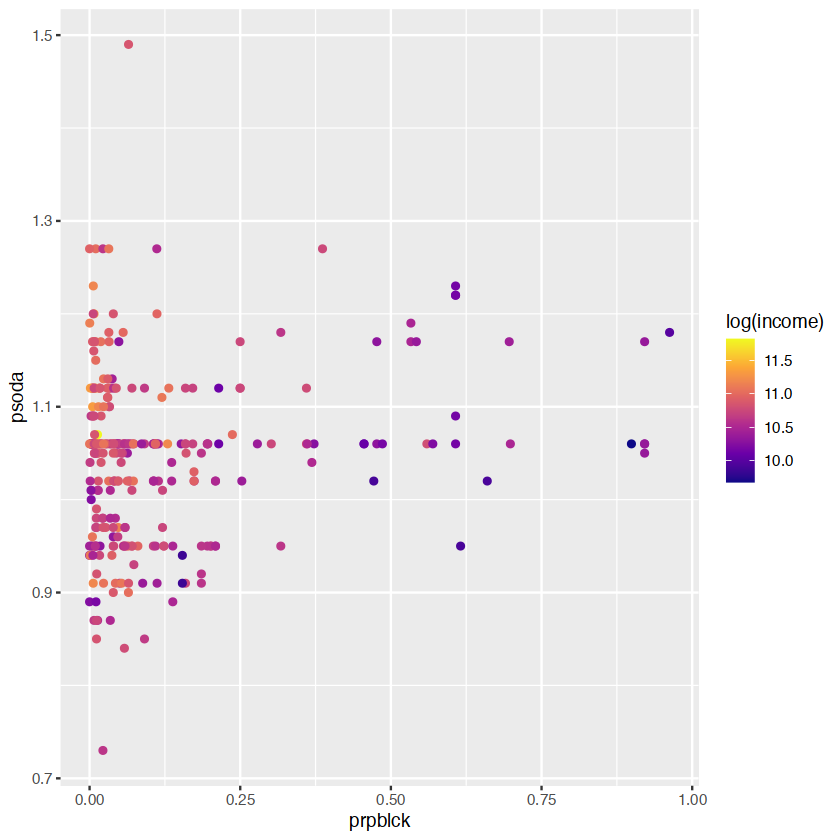

In [129]:
discrim %>% drop_na() %>%
ggplot(aes(x=prpblck, y=psoda, color = log(income))) + geom_point() + scale_color_viridis_c(option = "plasma")

In [147]:
# (iii) Smaller effect
summary(lm(psoda ~ prpblck, discrim))


Call:
lm(formula = psoda ~ prpblck, data = discrim)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3088 -0.0596  0.0114  0.0321  0.4484 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.03740    0.00519  199.87   <2e-16 ***
prpblck      0.06493    0.02396    2.71    0.007 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0881 on 399 degrees of freedom
  (9 observations deleted due to missingness)
Multiple R-squared:  0.0181,	Adjusted R-squared:  0.0156 
F-statistic: 7.34 on 1 and 399 DF,  p-value: 0.00702


In [148]:
# (iv) 0.2*.1216 equates to 2.43%
summary(lm(log(psoda) ~ prpblck + log(income), discrim))


Call:
lm(formula = log(psoda) ~ prpblck + log(income), data = discrim)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3356 -0.0470  0.0066  0.0433  0.3541 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  -0.7938     0.1794   -4.42 0.0000125 ***
prpblck       0.1216     0.0257    4.72 0.0000032 ***
log(income)   0.0765     0.0166    4.61 0.0000054 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0821 on 398 degrees of freedom
  (9 observations deleted due to missingness)
Multiple R-squared:  0.0681,	Adjusted R-squared:  0.0634 
F-statistic: 14.5 on 2 and 398 DF,  p-value: 0.000000804


In [150]:
# (v) coefficient of prpblck decreases 
summary(lm(log(psoda) ~ prpblck + log(income) + prppov, discrim))


Call:
lm(formula = log(psoda) ~ prpblck + log(income) + prppov, data = discrim)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3222 -0.0465  0.0065  0.0427  0.3562 

Coefficients:
            Estimate Std. Error t value   Pr(>|t|)    
(Intercept)  -1.4633     0.2937   -4.98 0.00000094 ***
prpblck       0.0728     0.0307    2.37     0.0181 *  
log(income)   0.1370     0.0268    5.12 0.00000048 ***
prppov        0.3804     0.1328    2.86     0.0044 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0814 on 397 degrees of freedom
  (9 observations deleted due to missingness)
Multiple R-squared:  0.087,	Adjusted R-squared:  0.0801 
F-statistic: 12.6 on 3 and 397 DF,  p-value: 0.0000000692


In [162]:
# (vi) Yes.
temp <- discrim %>% drop_na()
cor(temp$prppov, temp$lincome)

[1] -0.8468

In [ ]:
# (vii)

## C9

In [163]:
str(charity)

'data.frame':	4268 obs. of  8 variables:
 $ respond  : int  0 0 0 0 1 0 0 0 0 1 ...
 $ gift     : int  0 0 0 0 10 0 0 0 0 5 ...
 $ resplast : int  0 0 1 0 0 0 0 0 1 0 ...
 $ weekslast: num  143 65.4 13.1 120.1 103.9 ...
 $ propresp : num  0.3 0.3 0.3 0.3 0.2 ...
 $ mailsyear: num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ giftlast : int  10 10 10 10 10 10 10 5 10 5 ...
 $ avggift  : num  10 10 10 10 10 10 10 6 10 5 ...
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"


In [164]:
# (i) 7% more of the variance is explained by the multiple regression. mailsyear loses 20% of its weight in simple.
summary(lm(gift ~ mailsyear + giftlast + propresp, charity))


Call:
lm(formula = gift ~ mailsyear + giftlast + propresp, data = charity)

Residuals:
   Min     1Q Median     3Q    Max 
-52.89  -7.05  -3.65   1.40 241.21 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.55152    0.80303   -5.67  1.5e-08 ***
mailsyear    2.16626    0.33193    6.53  7.5e-11 ***
giftlast     0.00593    0.00143    4.14  3.6e-05 ***
propresp    15.35861    0.87454   17.56  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.4 on 4264 degrees of freedom
Multiple R-squared:  0.0834,	Adjusted R-squared:  0.0827 
F-statistic:  129 on 3 and 4264 DF,  p-value: <2e-16


In [165]:
summary(lm(gift ~ mailsyear, charity))


Call:
lm(formula = gift ~ mailsyear, data = charity)

Residuals:
   Min     1Q Median     3Q    Max 
-11.29  -7.98  -5.98   2.69 246.00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.014      0.739    2.72   0.0065 ** 
mailsyear      2.650      0.343    7.72  1.4e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15 on 4266 degrees of freedom
Multiple R-squared:  0.0138,	Adjusted R-squared:  0.0136 
F-statistic: 59.6 on 1 and 4266 DF,  p-value: 1.4e-14


(ii) mailsyear multiple regression coefficient is smaller

(iii) a 10% increase in response rate will increase gift by 1.5 units

In [167]:
# (iv) mailsyear is reduced by about 40%
summary(lm(gift ~ mailsyear + giftlast + propresp + avggift, charity))


Call:
lm(formula = gift ~ mailsyear + giftlast + propresp + avggift, 
    data = charity)

Residuals:
    Min      1Q  Median      3Q     Max 
-197.02   -5.88   -2.07    3.03  221.26 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -7.3278     0.7582   -9.66  < 2e-16 ***
mailsyear     1.2012     0.3124    3.84  0.00012 ***
giftlast     -0.2609     0.0108  -24.25  < 2e-16 ***
propresp     16.2046     0.8175   19.82  < 2e-16 ***
avggift       0.5269     0.0211   25.00  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.5 on 4263 degrees of freedom
Multiple R-squared:  0.201,	Adjusted R-squared:   0.2 
F-statistic:  267 on 4 and 4263 DF,  p-value: <2e-16


In [169]:
# (v) the variables are almost perfectly correlated
cor(charity$giftlast, charity$avggift)

[1] 0.9921

## C10

In [170]:
str(htv)

'data.frame':	1230 obs. of  23 variables:
 $ wage    : num  12.02 8.91 15.51 13.33 11.07 ...
 $ abil    : num  5.03 2.04 2.48 3.61 2.64 ...
 $ educ    : int  15 13 15 15 13 18 13 12 13 12 ...
 $ ne      : int  0 1 1 1 1 1 1 0 1 1 ...
 $ nc      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ west    : int  1 0 0 0 0 0 0 0 0 0 ...
 $ south   : int  0 0 0 0 0 0 0 1 0 0 ...
 $ exper   : int  9 8 11 6 15 8 13 14 9 9 ...
 $ motheduc: int  12 12 12 12 12 12 13 12 10 14 ...
 $ fatheduc: int  12 10 16 12 15 12 12 12 12 12 ...
 $ brkhme14: int  0 1 0 0 1 0 0 1 1 0 ...
 $ sibs    : int  1 4 2 1 2 2 5 4 3 1 ...
 $ urban   : int  1 1 1 1 1 1 1 0 1 1 ...
 $ ne18    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ nc18    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ south18 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ west18  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ urban18 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ tuit17  : num  7.58 8.6 7.31 9.5 7.31 ...
 $ tuit18  : num  7.26 9.5 7.31 10.16 7.31 ...
 $ lwage   : num  2.49 2.19 2.74 2.59 2.4 ...
 $ expersq : int

In [171]:
# (i)
# range of educ
max(htv$educ) - min(htv$educ)

[1] 14

In [174]:
count(htv, educ==12)

educ == 12,n
<lgl>,<int>
FALSE,718
TRUE,512


In [177]:
mean(htv$educ)-mean(c(htv$motheduc, htv$fatheduc))

[1] 0.7248

In [180]:
# (ii) 25% of the sample variation in educ is accounted for.
# For 1 additional year in motheduc 0.3 years of additional educ are predicted
summary(lm(educ ~ motheduc + fatheduc, htv))


Call:
lm(formula = educ ~ motheduc + fatheduc, data = htv)

Residuals:
   Min     1Q Median     3Q    Max 
-6.290 -0.940 -0.404  1.124  8.167 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.9644     0.3198   21.78   <2e-16 ***
motheduc      0.3042     0.0319    9.53   <2e-16 ***
fatheduc      0.1903     0.0223    8.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.04 on 1227 degrees of freedom
Multiple R-squared:  0.249,	Adjusted R-squared:  0.248 
F-statistic:  204 on 2 and 1227 DF,  p-value: <2e-16


In [181]:
# (iii) yes. 18% more of the sample variation in educ is explained.
summary(lm(educ ~ motheduc + fatheduc + abil, htv))


Call:
lm(formula = educ ~ motheduc + fatheduc + abil, data = htv)

Residuals:
   Min     1Q Median     3Q    Max 
-5.407 -1.195 -0.199  1.076  7.012 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.4487     0.2895   29.18  < 2e-16 ***
motheduc      0.1891     0.0285    6.63  4.9e-11 ***
fatheduc      0.1111     0.0199    5.59  2.9e-08 ***
abil          0.5025     0.0257   19.54  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.78 on 1226 degrees of freedom
Multiple R-squared:  0.428,	Adjusted R-squared:  0.426 
F-statistic:  305 on 3 and 1226 DF,  p-value: <2e-16


In [186]:
# (iv)
model <- lm(educ ~ motheduc + fatheduc + abil +I(abil^2), htv)
summary(model)


Call:
lm(formula = educ ~ motheduc + fatheduc + abil + I(abil^2), data = htv)

Residuals:
   Min     1Q Median     3Q    Max 
-5.251 -1.127 -0.135  1.022  7.048 

Coefficients:
            Estimate Std. Error t value      Pr(>|t|)    
(Intercept)   8.2402     0.2874   28.67       < 2e-16 ***
motheduc      0.1901     0.0281    6.77 0.00000000002 ***
fatheduc      0.1089     0.0196    5.56 0.00000003351 ***
abil          0.4015     0.0303   13.26       < 2e-16 ***
I(abil^2)     0.0506     0.0083    6.09 0.00000000148 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.76 on 1225 degrees of freedom
Multiple R-squared:  0.444,	Adjusted R-squared:  0.443 
F-statistic:  245 on 4 and 1225 DF,  p-value: <2e-16


$ \frac{d*educ}{d*abil} = 0.4015 + 2*0.0506*abil = 0 $

$ abil \thickapprox -4 $

$ \frac{d^2*educ}{d*abil} = 2*0.0506 > 0 $

In [184]:
# (v)
count(htv, abil < -4)

abil < -4,n
<lgl>,<int>
FALSE,1216
TRUE,14


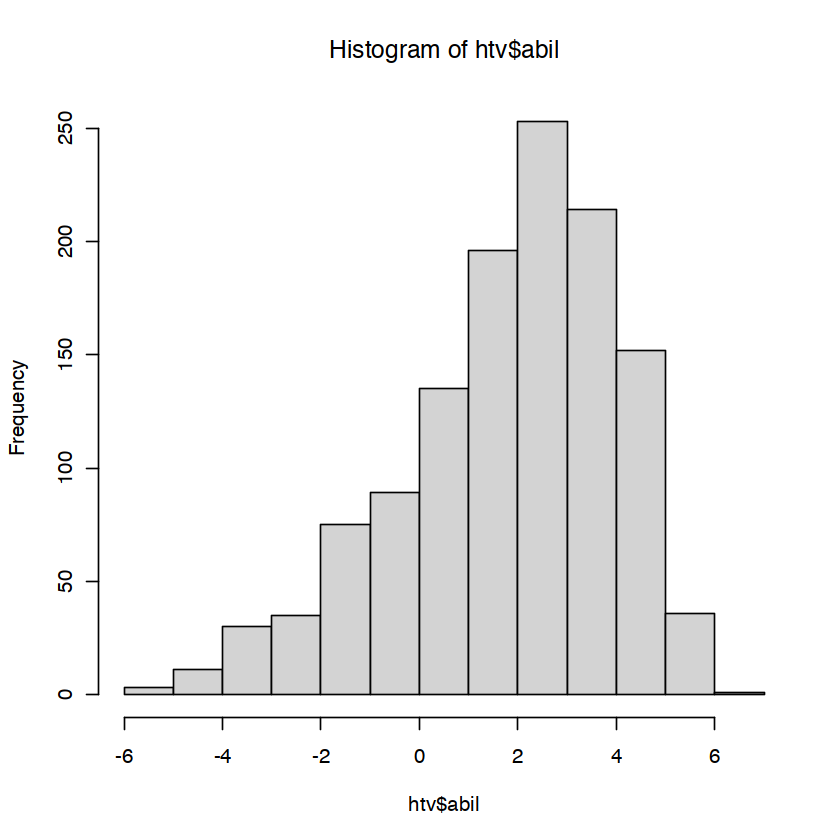

In [185]:
hist(htv $abil)

In [187]:
lr <- function(abil) {
    educ <- 11.91 + 0.4015*abil + 0.0506*abil**2
    return(educ)
    }

In [189]:
htv_plus <- mutate(htv, educ_hat = lr(abil))

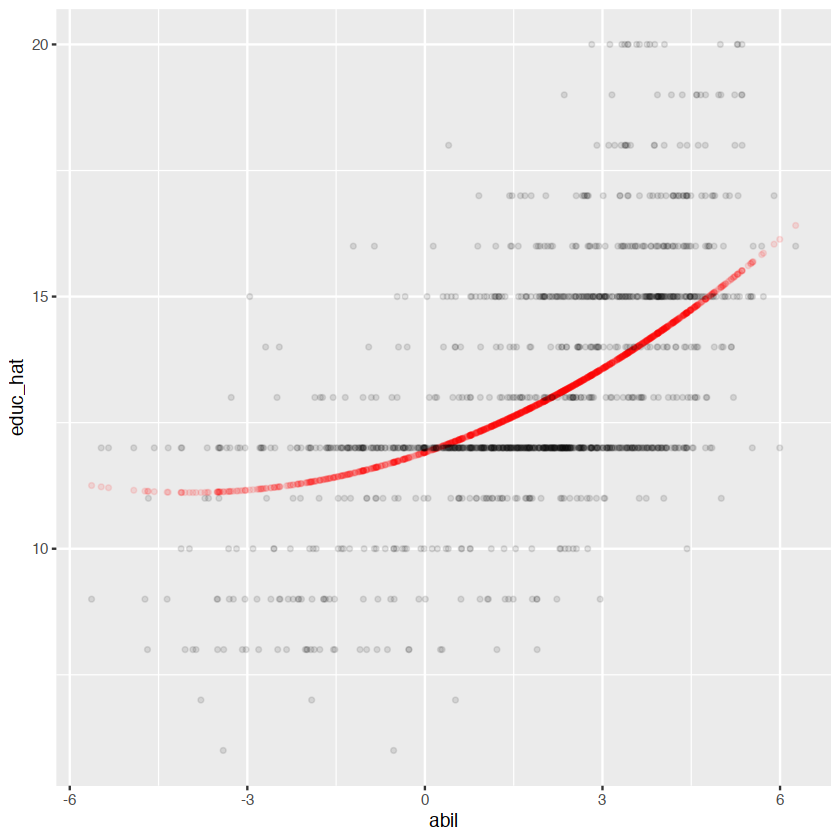

In [208]:
ggplot(htv_plus, aes(abil, educ_hat)) + 
geom_point(alpha=0.1, size =1, color="red") + 
geom_point(mapping=aes(abil, educ), size =1, alpha = 0.1)

## C11

In [209]:
str(meapsingle)

'data.frame':	229 obs. of  18 variables:
 $ dcode   : int  63010 63010 63270 63270 63010 63010 63010 63130 63130 63130 ...
 $ bcode   : int  3030 3133 2023 2978 316 5670 1494 1631 1753 2254 ...
 $ math4   : num  92.8 100 72.1 76.1 95.2 88.6 95.2 66.7 83.9 95.7 ...
 $ read4   : num  82.5 94.3 46.5 65.7 80.6 72.7 90.5 46.3 44.6 56.5 ...
 $ enroll  : int  607 370 220 356 329 331 288 452 428 238 ...
 $ exppp   : num  6620 6620 5608 5830 6620 ...
 $ free    : num  1 0 5.9 8.1 0.3 1.2 12.2 50.2 40.2 24.4 ...
 $ reduced : num  0.7 0 5 2.8 0.3 0.9 5.2 17.5 10 17.6 ...
 $ lunch   : num  1.7 0 10.9 10.9 0.6 2.1 17.4 67.7 50.2 42 ...
 $ medinc  : int  110322 110322 65119 65119 109313 109313 109313 43750 43750 43750 ...
 $ totchild: int  4076 4076 2524 2524 3486 3486 3486 4651 4651 4651 ...
 $ married : int  3542 3542 2091 2091 3241 3241 3241 3258 3258 3258 ...
 $ single  : int  534 534 433 433 245 245 245 1393 1393 1393 ...
 $ pctsgle : num  13.1 13.1 17.16 17.16 7.03 ...
 $ zipcode : int  48009 

In [210]:
# (i) Effect seems large for pctsgle
summary(lm(math4 ~ pctsgle, meapsingle))


Call:
lm(formula = math4 ~ pctsgle, data = meapsingle)

Residuals:
   Min     1Q Median     3Q    Max 
-47.79  -8.31   1.60   8.09  50.32 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  96.7704     1.5968    60.6   <2e-16 ***
pctsgle      -0.8329     0.0707   -11.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.5 on 227 degrees of freedom
Multiple R-squared:  0.38,	Adjusted R-squared:  0.377 
F-statistic:  139 on 1 and 227 DF,  p-value: <2e-16


In [211]:
# (ii) Omitted variable bias
summary(lm(math4 ~ pctsgle + lmedinc + free, meapsingle))


Call:
lm(formula = math4 ~ pctsgle + lmedinc + free, data = meapsingle)

Residuals:
   Min     1Q Median     3Q    Max 
-34.92  -7.19   0.93   7.31  50.15 

Coefficients:
            Estimate Std. Error t value    Pr(>|t|)    
(Intercept)  51.7232    58.4781    0.88        0.38    
pctsgle      -0.1996     0.1587   -1.26        0.21    
lmedinc       3.5601     5.0417    0.71        0.48    
free         -0.3964     0.0703   -5.64 0.000000052 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.7 on 225 degrees of freedom
Multiple R-squared:  0.46,	Adjusted R-squared:  0.453 
F-statistic: 63.8 on 3 and 225 DF,  p-value: <2e-16


In [212]:
cor(meapsingle$pctsgle, meapsingle$lmedinc)

[1] -0.8686

In [213]:
cor(meapsingle$pctsgle, meapsingle$free)

[1] 0.8264

In [214]:
# (iii) Yep, poorer people are eligible for free lunches
cor(meapsingle$free, meapsingle$lmedinc)

[1] -0.747

In [233]:
# (v)
# VIF for pctsgle
1/(1-summary(lm(pctsgle ~ lmedinc + free, meapsingle))$r.squared)

[1] 5.741

In [234]:
# VIF for lmedinc
1/(1-summary(lm(lmedinc ~ pctsgle + free, meapsingle))$r.squared)

[1] 4.119

In [235]:
# VIF for free
1/(1-summary(lm(free ~ lmedinc + pctsgle, meapsingle))$r.squared)

[1] 3.188

## C12

In [236]:
str(econmath)

'data.frame':	856 obs. of  17 variables:
 $ age     : int  23 23 21 22 22 22 22 22 22 21 ...
 $ work    : num  15 0 25 30 25 0 20 20 28 22.5 ...
 $ study   : num  10 22.5 12 40 15 30 25 15 7 25 ...
 $ econhs  : int  0 1 0 0 1 0 1 0 0 0 ...
 $ colgpa  : num  3.49 2.1 3.09 2.68 3.75 ...
 $ hsgpa   : num  3.35 3.22 3.31 3.98 3.89 ...
 $ acteng  : int  24 23 21 31 28 25 15 28 28 18 ...
 $ actmth  : int  26 20 24 28 31 30 19 30 28 19 ...
 $ act     : int  27 24 21 31 32 28 18 32 30 17 ...
 $ mathscr : int  10 9 8 10 8 10 9 9 6 9 ...
 $ male    : int  1 1 1 0 1 1 0 1 0 0 ...
 $ calculus: int  1 0 1 1 1 1 1 1 0 1 ...
 $ attexc  : int  0 0 1 0 0 1 0 1 1 0 ...
 $ attgood : int  0 0 0 1 1 0 1 0 0 1 ...
 $ fathcoll: int  1 0 0 1 0 0 0 1 0 0 ...
 $ mothcoll: int  1 1 1 1 1 1 0 1 1 0 ...
 $ score   : num  84.4 57.4 66.4 81.2 95.9 ...


In [244]:
# (i)
econmath %>% drop_na() %>% summarize(max(score), mean(score), mean(actmth), sd(actmth), mean(acteng), sd(acteng))

max(score),mean(score),mean(actmth),sd(actmth),mean(acteng),sd(acteng)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
98.44,72.61,23.21,3.773,22.59,3.789


In [245]:
# (ii)
summary(lm(score ~ colgpa + actmth + acteng, econmath))


Call:
lm(formula = score ~ colgpa + actmth + acteng, data = econmath)

Residuals:
   Min     1Q Median     3Q    Max 
-39.86  -6.21   0.44   6.81  32.67 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  16.1740     2.8004    5.78  1.1e-08 ***
colgpa       12.3662     0.7151   17.29  < 2e-16 ***
actmth        0.8834     0.1122    7.87  1.1e-14 ***
acteng        0.0518     0.1111    0.47     0.64    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.3 on 810 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.397,	Adjusted R-squared:  0.395 
F-statistic:  178 on 3 and 810 DF,  p-value: <2e-16
